In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# load cleaned dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Dee-M123/Africa-Economic-Banking-and-Systemic-Crisis/refs/heads/main/Data/cleaned/african_crises_cleaned.csv")

df.head(3)


,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,1
1,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,0
2,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,0


# Numeric column distribution

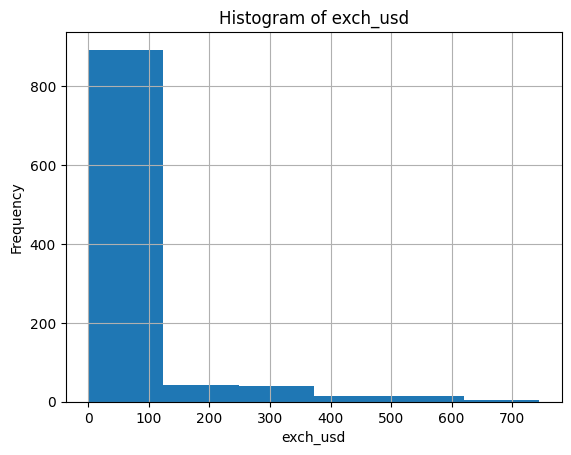

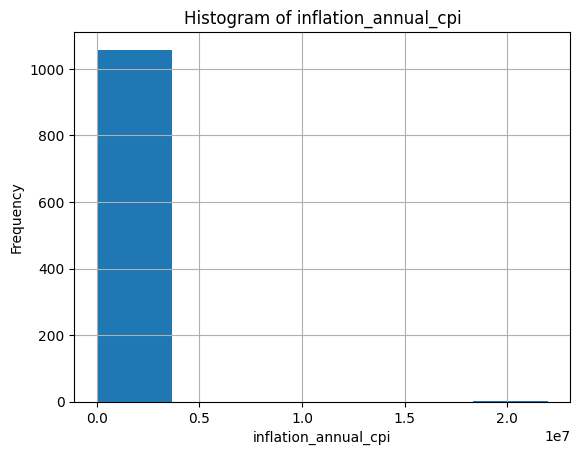

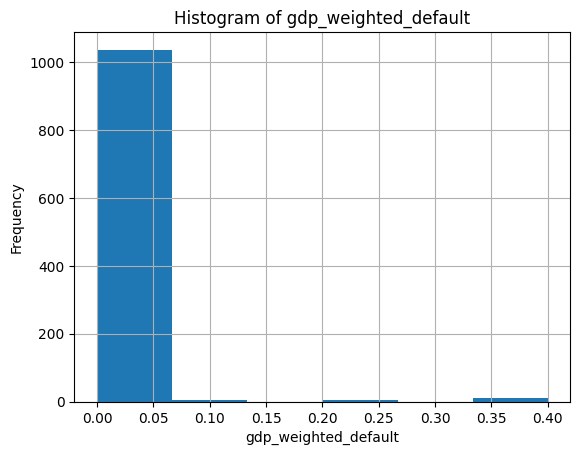

In [4]:
numeric_cols = ['exch_usd','inflation_annual_cpi','gdp_weighted_default']

#histograms of numeric columns
for col in numeric_cols:
    plt.figure()
    df[col].hist(bins=6)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

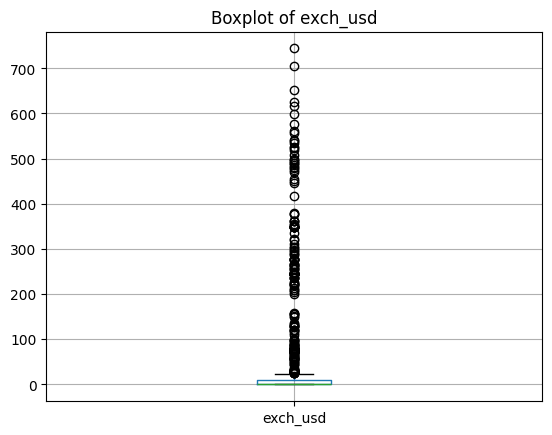

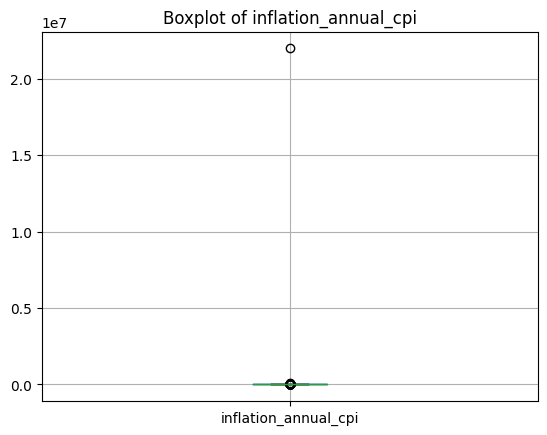

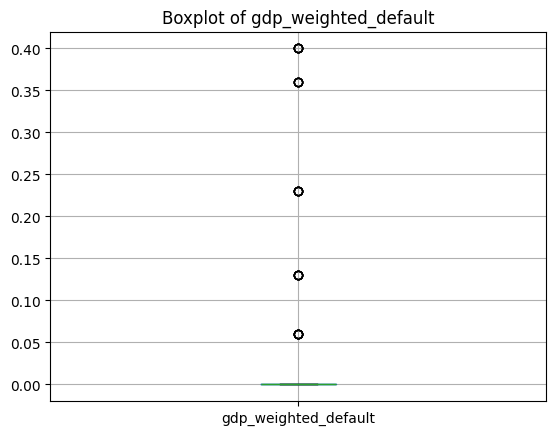

In [5]:
#Boxplots
for col in numeric_cols:
    plt.figure()
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

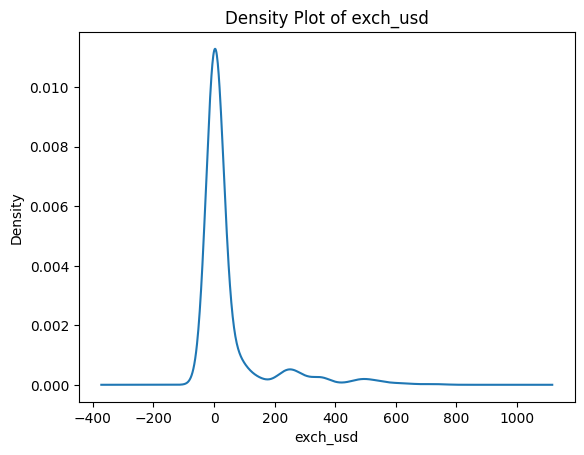

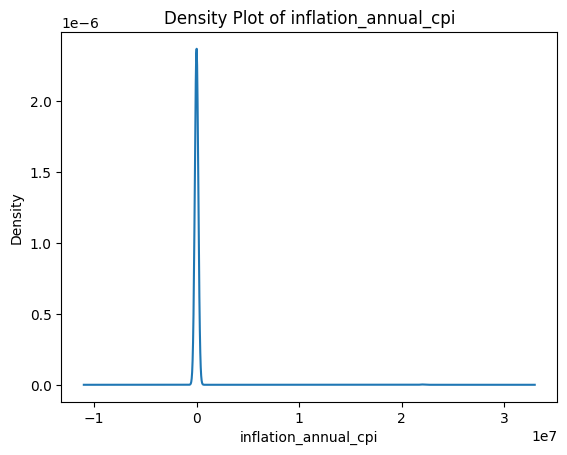

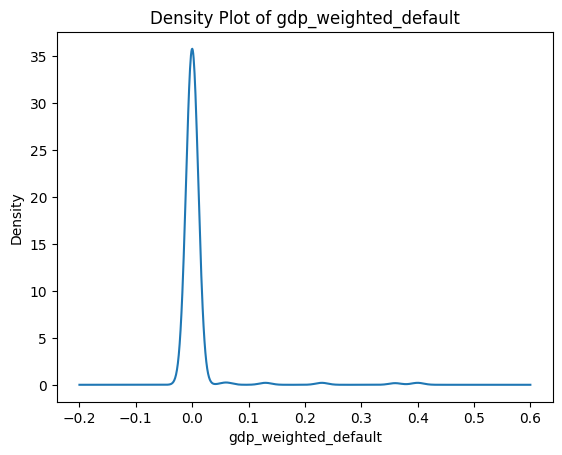

In [6]:
# Desity plot
for col in numeric_cols:
    plt.figure()
    df[col].plot(kind='density')
    plt.title(f"Density Plot of {col}")
    plt.xlabel(col)
    plt.show()

The data shows extreme right skew and long tails in box blot as well. Meaning there is a higher level of outliers

# Handling numeric outliers

The outliers are import, consideration the discussion around crisis. Subsets will be created to store outlier data

In [7]:
#outlier function
def get_iqr_bounds(series):

    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)

    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR

    upper = Q3 + 1.5 * IQR

    return lower, upper

Inflation Outlier Subset

In [8]:
lower, upper = get_iqr_bounds(df['inflation_annual_cpi'])

inflation_outliers = df[(df['inflation_annual_cpi'] < lower) |(df['inflation_annual_cpi'] > upper)]

inflation_normal = df[(df['inflation_annual_cpi'] >= lower) & (df['inflation_annual_cpi'] <= upper)]

print("Inflation outlier rows:", len(inflation_outliers))

Inflation outlier rows: 108


Exchange Rate Outlier Subset

In [9]:
lower, upper = get_iqr_bounds(df['exch_usd'])

exchange_outliers = df[(df['exch_usd'] < lower) |(df['exch_usd'] > upper)]

exchange_normal = df[(df['exch_usd'] >= lower) & (df['exch_usd'] <= upper)]

print("Exchange rate outlier rows:", len(exchange_outliers))

Exchange rate outlier rows: 204


GDP Weighted Default Outliers

In [10]:
lower, upper = get_iqr_bounds(df['gdp_weighted_default'])

gdp_outliers = df[(df['gdp_weighted_default'] < lower) |(df['gdp_weighted_default'] > upper)]

gdp_normal = df[(df['gdp_weighted_default'] >= lower) & (df['gdp_weighted_default'] <= upper)]

print("GDP weighted defualt outlier rows:", len(gdp_outliers))

GDP weighted defualt outlier rows: 30


In [11]:

inflation_outliers['banking_crisis'].mean()


np.float64(0.25925925925925924)

# Categorical columns distribution

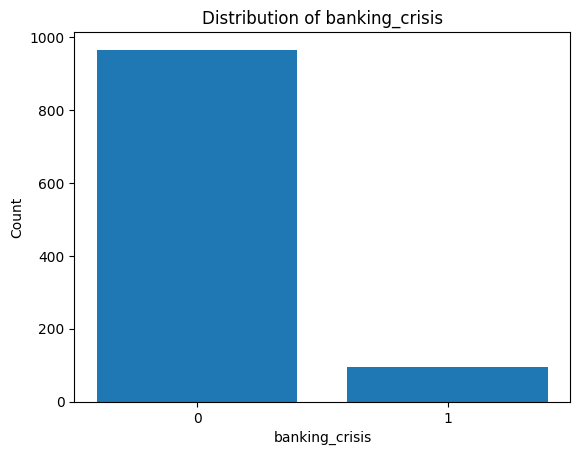

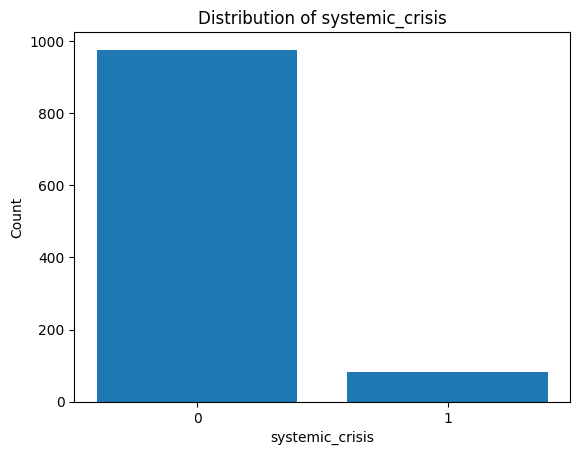

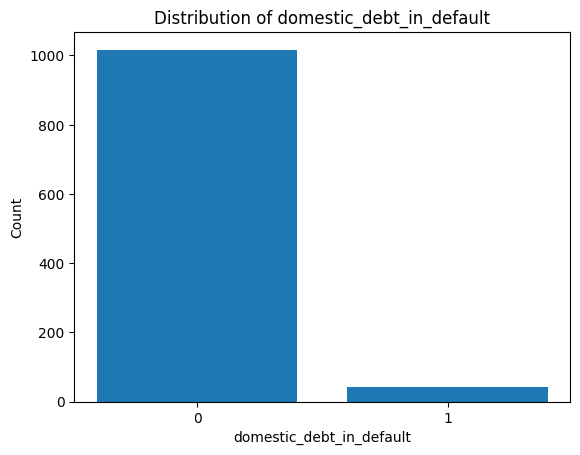

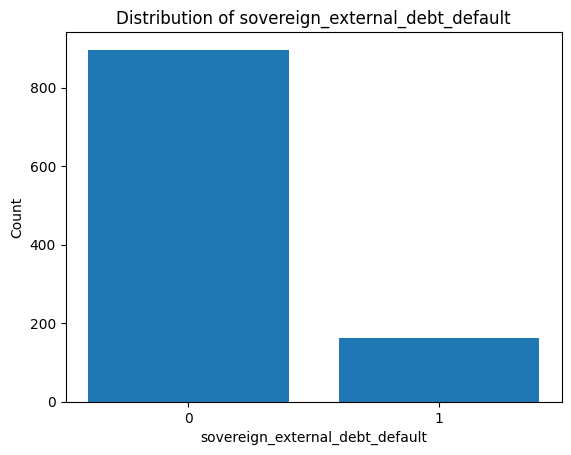

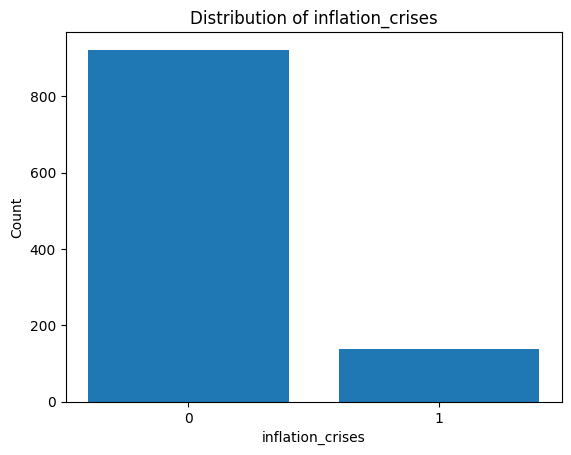

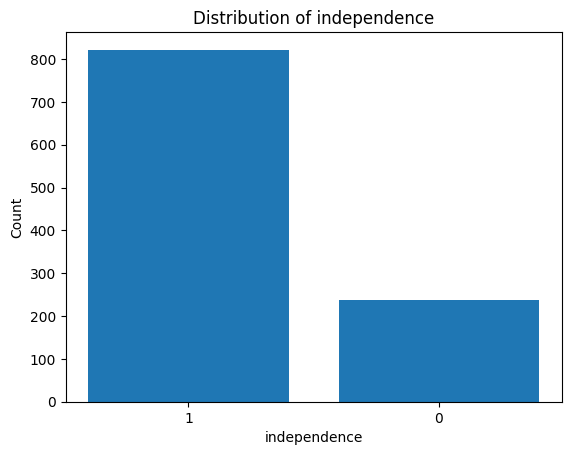

In [12]:

categorical_cols = [
    'banking_crisis',
    'systemic_crisis',
    'domestic_debt_in_default',
    'sovereign_external_debt_default',
    'inflation_crises',
    'independence'
]

for col in categorical_cols:
    counts = df[col].value_counts()

    plt.figure()
    plt.bar(counts.index.astype(str), counts.values)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

Crisis Frequency Over Time

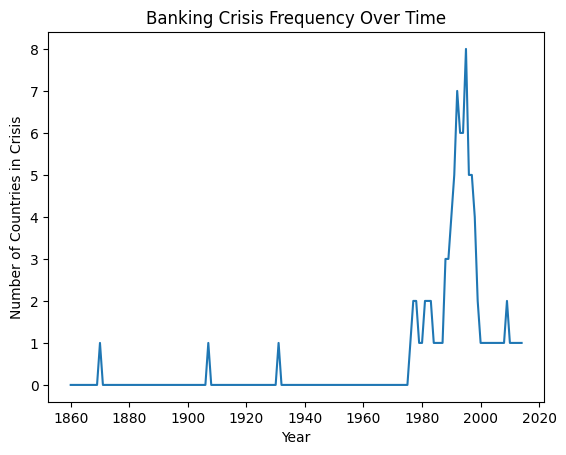

In [13]:

crisis_by_year = df.groupby('year')['banking_crisis'].sum()

plt.figure()
plt.plot(crisis_by_year)
plt.title("Banking Crisis Frequency Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Countries in Crisis")
plt.show()

Crisis by Country

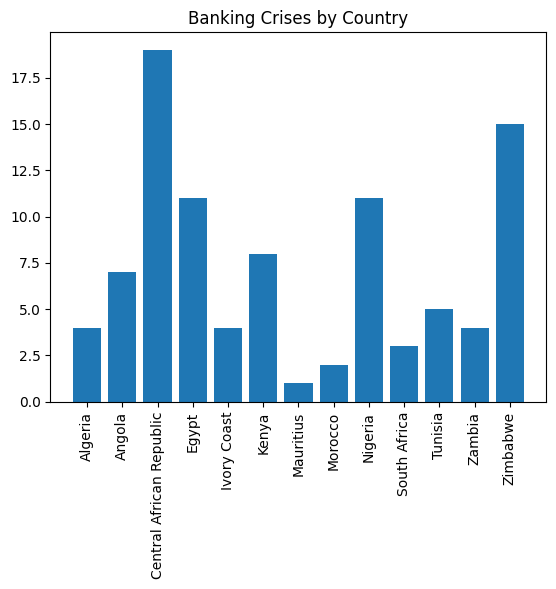

In [14]:
country_crisis = df.groupby('country')['banking_crisis'].sum()

plt.figure()
plt.bar(country_crisis.index, country_crisis)
plt.xticks(rotation=90)
plt.title("Banking Crises by Country")
plt.show()

heatmap of numeric columns

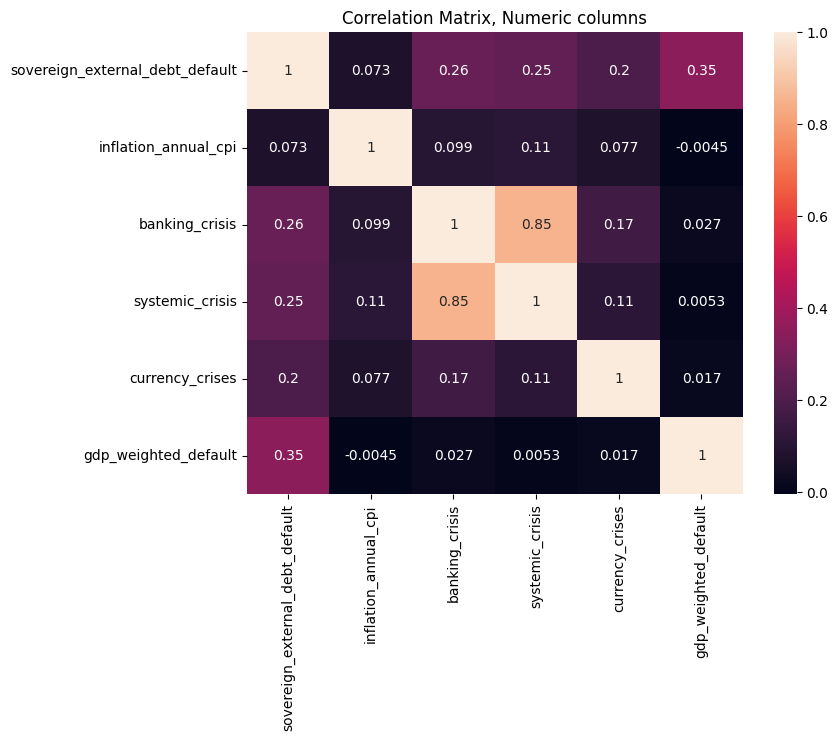

In [15]:
numeric_cols = ['sovereign_external_debt_default','inflation_annual_cpi','banking_crisis','systemic_crisis','currency_crises','gdp_weighted_default']

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix, Numeric columns")
plt.show()

# Business questions

**First question**:
What macroeconomic conditions increase sovereign default risk?


**Second question**: Which historical period was most economically unstable?

